In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yt
%matplotlib notebook

## No potential - 1D density profile

#### To swap between no potentail and quadratic potential change prescribe_grav_potential.cpp line 35 and inputs line 122.  

yt : [INFO     ] 2019-05-21 14:06:10,469 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-21 14:06:10,472 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:06:10,474 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:06:10,475 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-21 14:06:10,531 Parameters: current_time              = 4.14183603764323
yt : [INFO     ] 2019-05-21 14:06:10,532 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:06:10,533 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:06:10,534 Parameters: domain_right_edge         = [1. 1. 1.]


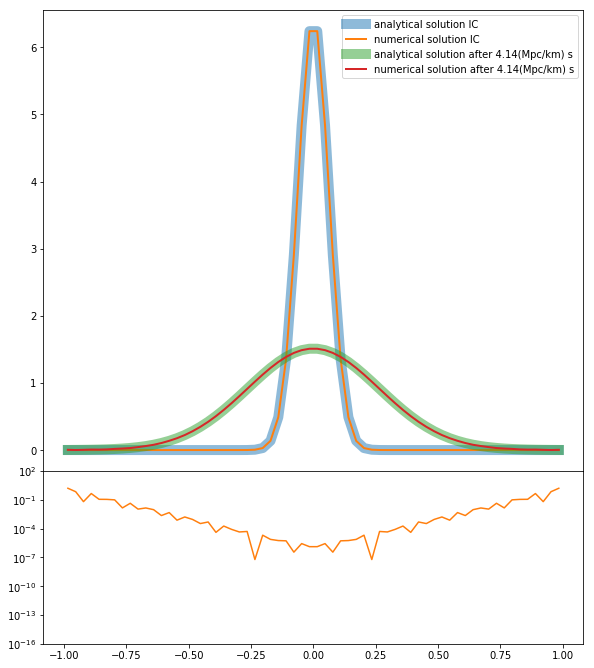

In [2]:
ds = yt.load("plt_gauss_no_gravity_igp00000")
ds2 = yt.load("plt_gauss_no_gravity_igp00200")
ad = ds.all_data()
ad2 = ds2.all_data()
list1 = ad[("boxlib","AxDens")]
list2 = ad2[("boxlib","AxDens")]
x = ad[("boxlib","x")]
x2 = ad2[("boxlib","x")]
y = ad[("boxlib","y")]
y2 = ad2[("boxlib","y")]
z = ad[("boxlib","z")]
z2 = ad2[("boxlib","z")]
index = np.intersect1d(np.where(y==0.015625),np.where(z==0.015625))
index2 = np.intersect1d(np.where(y2==0.015625),np.where(z2==0.015625))
time1 = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time1)

gamma =0.01917152/2.5
sigmaR = 0.05
hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0
            
## Analytical solution - no potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x[index]]
ana_dens2 = [np.sqrt(omega/np.pi/hbaroverm/(1+(del_t*omega)**2))*np.exp(-(x-igp)**2*omega/gamma/(1+(del_t*omega)**2))   for x in x2[index2]]

fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x[index], ana_dens, linewidth=10, alpha=0.5, label="analytical solution IC")
topplot.plot(x[index], list1[index], linewidth=2, label="numerical solution IC")
botplot.plot(x[index], abs(list1[index]-ana_dens)/ana_dens)

topplot.plot(x2[index2], ana_dens2, '-', linewidth=10, alpha=0.5, label="analytical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
topplot.plot(x2[index2], list2[index2], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
botplot.plot(x2[index2], abs(list2[index2]-ana_dens2)/ana_dens2)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc =1)
plt.show()


## Quadratic potential - 1D density profile

yt : [INFO     ] 2019-05-21 14:06:19,414 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-21 14:06:19,415 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:06:19,416 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:06:19,418 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-21 14:06:19,532 Parameters: current_time              = 3.13385225696839
yt : [INFO     ] 2019-05-21 14:06:19,533 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:06:19,534 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:06:19,535 Parameters: domain_right_edge         = [1. 1. 1.]


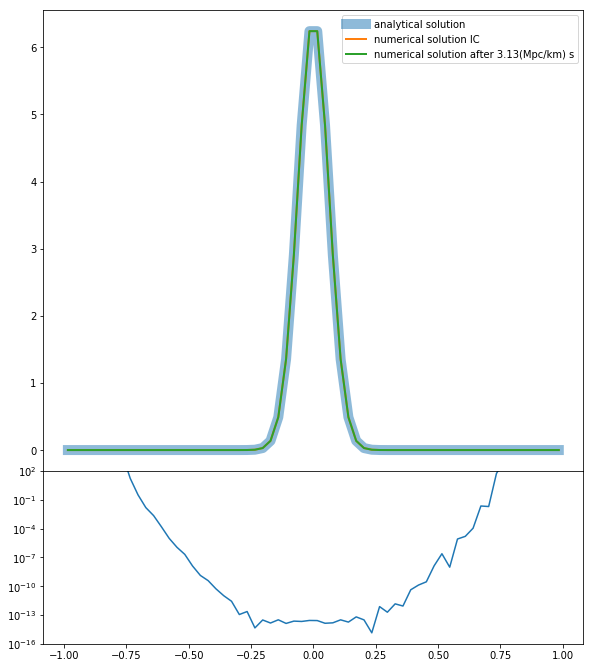

In [3]:
ds = yt.load("plt_gauss_quadpot00000")
ds2 = yt.load("plt_gauss_quadpot00200")
ad = ds.all_data()
ad2 = ds2.all_data()
dens = ad[("boxlib","AxDens")]
dens2 = ad2[("boxlib","AxDens")]
x = ad[("boxlib","x")]
x2 = ad2[("boxlib","x")]
y = ad[("boxlib","y")]
y2 = ad2[("boxlib","y")]
z = ad[("boxlib","z")]
z2 = ad2[("boxlib","z")]
index = np.intersect1d(np.where(y==0.015625),np.where(z==0.015625))
index2 = np.intersect1d(np.where(y2==0.015625),np.where(z2==0.015625))
time1 = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time1) 

hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0
            
## Analytical solution - quadtratic potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x[index]]

fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x[index], ana_dens, linewidth=10, alpha=0.5, label="analytical solution")
topplot.plot(x[index], dens[index], linewidth=2, label="numerical solution IC")
topplot.plot(x2[index2], dens2[index2], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")

botplot.plot(x2[index2], abs(dens2[index2]-ana_dens)/ana_dens)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc=1)
plt.show()

## Deviation from the analytical solution in the center with time 

yt : [INFO     ] 2019-05-21 14:25:56,572 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-21 14:25:56,573 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:25:56,574 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:25:56,575 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-21 14:25:57,628 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-21 14:25:57,630 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:25:57,631 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:25:57,632 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-21 14:25:58,121 Max Value is 6.24080e+00 at -0.0156250000000000 -0.9843750000000000 -0.9843750000000000
yt : [INFO     ] 2019-05-21 14:25:58,224 Parameters: current_time              = 1.55065576664581
yt : [INFO     ] 2019-05-21 14:25:58,225 Para

6.240802453567693


yt : [INFO     ] 2019-05-21 14:25:58,882 Max Value is 6.24080e+00 at 0.0156250000000000 -0.9843750000000000 -0.9843750000000000
yt : [INFO     ] 2019-05-21 14:25:58,930 Parameters: current_time              = 3.13385225696839
yt : [INFO     ] 2019-05-21 14:25:58,931 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-21 14:25:58,932 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-21 14:25:58,933 Parameters: domain_right_edge         = [1. 1. 1.]


6.240802453567962


yt : [INFO     ] 2019-05-21 14:25:59,463 Max Value is 6.24080e+00 at -0.0156250000000000 -0.9843750000000000 -0.9843750000000000


6.240802453567862


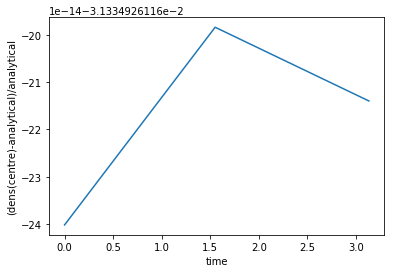

In [10]:
ds = yt.load("plt_gauss_quadpot00000")
ad = ds.all_data()
list0 = ad[("boxlib","AxDens")]
x = ad[("boxlib","x")]
y = ad[("boxlib","y")]
z = ad[("boxlib","z")]
index = np.intersect1d(np.where(y==0.015625),np.where(z==0.015625))
time0 = ds.current_time

#xlo = ds.domain_left_edge[0]
#xhi = ds.domain_right_edge[0]
#boxsize = float(xhi - xlo)
#N=int(int(len(list0))**(1/3)+0.5)
    
hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

# Analytical solution - quadtratic potential 
#ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x[index]]
ana_dens = np.sqrt(omega/np.pi/hbaroverm)

list_snshots =np.arange(0,500,10)
times=[] 
center_diffs=[]

ts = yt.load("plt_gauss_quadpot?????")

for ds in ts:
#    ds = yt.load("plt_gauss_quadpot00"+str(s).zfill(3))
#    ad = ds.all_data()
#    list1 = ad[("boxlib","AxDens")]
    max_dens = ds.find_max("AxDens")[0].v
    print(max_dens)
    time1 = ds.current_time
    times.append(float(time1 - time0))
    center_diffs.append((max_dens-ana_dens)/ana_dens)


#    density1 = np.zeros((N,N,N))

#     for i in range(0, N):
#         for j in range(0, N):
#             for k in range(0, N):
#                 density1[i,j,k]=list1[N*(N*i+k)+j]
            
#    center_diffs.append((list1[N*(N*int(N/2)+int(N/2))+int(N/2)]-ana_dens[int(N/2)])/ana_dens[int(N/2)])

#fig = plt.figure()
plt.plot(times, center_diffs)
plt.xlabel('time')
plt.ylabel('(dens(max)-analytical)/analytical')
plt.show()